In [375]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

**Data** **Collection**

In [376]:
# loading iris dataset
iris = load_iris()

In [377]:
# looking for the features of iris dataset
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [378]:
# getting iris Data
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [379]:
# getting iris feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [380]:
# getting iris target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [381]:
# getting iris target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Data Processing**

In [382]:
# creating iris DataFrame using pandas 
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [383]:
# getting some information about the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [384]:
# checking for null values
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

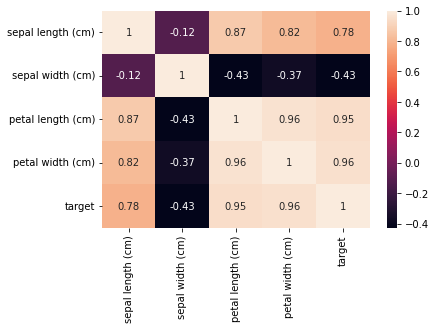

In [385]:
# getting correlation between the features
sns.heatmap(iris_data.corr(), annot=True)

**Data Visualisation**

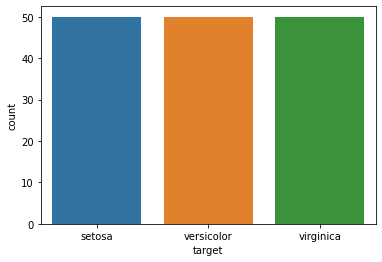

In [386]:
# ploting the graph of target value counts
ax = sns.countplot(data=iris_data, x='target')
ax.set(xticklabels=iris.target_names)
plt.show()

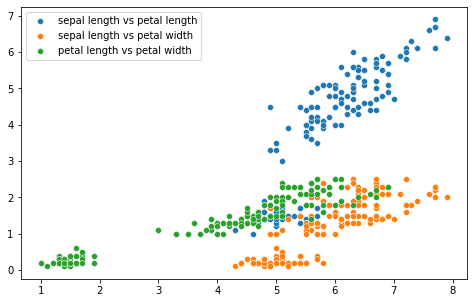

In [387]:
# visualising the relations between features
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris_data, x='sepal length (cm)', y='petal length (cm)', label='sepal length vs petal length')
sns.scatterplot(data=iris_data, x='sepal length (cm)', y='petal width (cm)', label='sepal length vs petal width')
sns.scatterplot(data=iris_data, x='petal length (cm)', y='petal width (cm)', label='petal length vs petal width')
plt.xlabel("")
plt.ylabel("")
plt.legend()

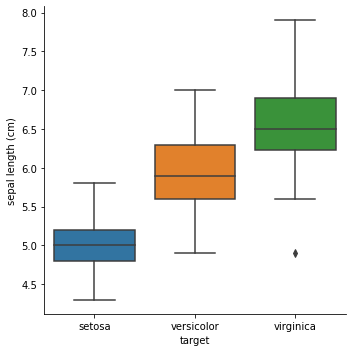

In [388]:
# target vs sepal length
ax = sns.catplot(data=iris_data, x='target', y='sepal length (cm)', kind='box')
ax.set(xticklabels=iris.target_names)

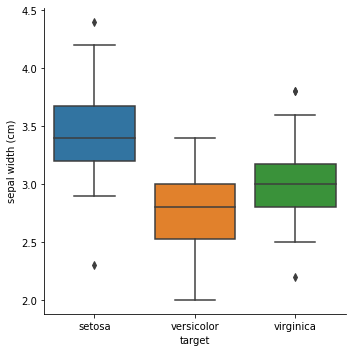

In [389]:
# target vs sepal width
ax = sns.catplot(data=iris_data, x='target', y='sepal width (cm)', kind='box')
ax.set(xticklabels=iris.target_names)

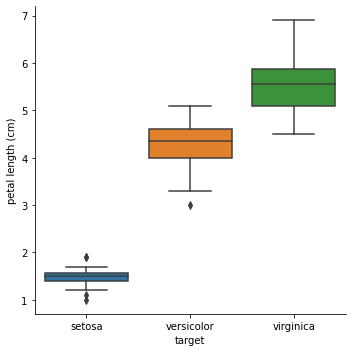

In [390]:
# target vs petal length
ax = sns.catplot(data=iris_data, x='target', y='petal length (cm)', kind='box')
ax.set(xticklabels=iris.target_names)

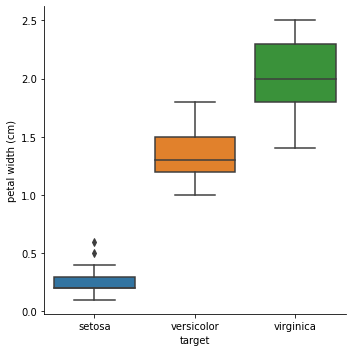

In [391]:
# target vs petal width
ax = sns.catplot(data=iris_data, x='target', y='petal width (cm)', kind='box')
ax.set(xticklabels=iris.target_names)

**Splitting the dataset**

In [392]:
# splitting the dataset into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=2, stratify=iris.target)

**Model Training and Evaluation**

**1.** Classification

In [393]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
k_class = KNeighborsClassifier(n_neighbors=12)
k_class.fit(X_train, Y_train)
k_class.score(X_test, Y_test)

1.0

In [394]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb_class = GradientBoostingClassifier()
gb_class.fit(X_train, Y_train)
gb_class.score(X_test, Y_test)

1.0

In [395]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier()
rf_class.fit(X_train, Y_train)
rf_class.score(X_test, Y_test)

1.0

In [396]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_class = LogisticRegression()
lr_class.fit(X_train, Y_train)
lr_class.score(X_test, Y_test)

1.0

In [397]:
# confusion matrix for RandomForestClassifier, since accuracy is less compared to other models
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(rf_class.predict(X_test), Y_test)
c_mat

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

Text(33.0, 0.5, 'Actual Values')

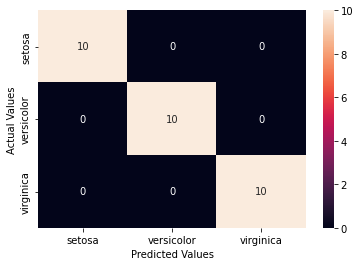

In [398]:
# heatmap of confusion matrix
sns.heatmap(c_mat, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

**2.** Clustering

In [399]:
new_iris_data = iris_data.copy()
new_iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**2.1.** *sepal length and sepal width*

In [400]:
# sepal length and sepal width
X = new_iris_data.iloc[:, [0, 1]]

In [401]:
# finding n_cluster value using Elbow method
lst1 = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  lst1.append(kmeans.inertia_)

Text(0, 0.5, 'Varience')

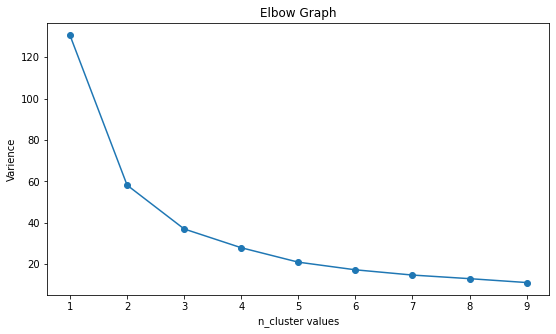

In [402]:
# visualising Elbow Graph
plt.figure(figsize=(9, 5))
plt.plot(range(1, 10), lst1, marker='o')
plt.title('Elbow Graph')
plt.xlabel("n_cluster values")
plt.ylabel("Varience")

In [403]:
# predicting the clusters 
kmeans = KMeans(n_clusters=3)
kmeans_pred_X = kmeans.fit_predict(X)

In [404]:
new_iris_data['clusters1'] = kmeans_pred_X
new_iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusters1
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [405]:
df1 = new_iris_data[new_iris_data.clusters1==0]
df2 = new_iris_data[new_iris_data.clusters1==1]
df3 = new_iris_data[new_iris_data.clusters1==2]

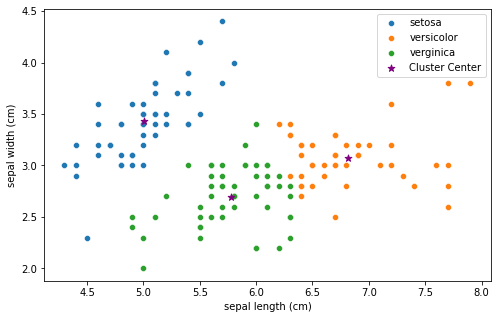

In [406]:
# visualising the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(df1["sepal length (cm)"], df1["sepal width (cm)"], label="setosa")
sns.scatterplot(df2["sepal length (cm)"], df2["sepal width (cm)"], label="versicolor")
sns.scatterplot(df3["sepal length (cm)"], df3["sepal width (cm)"], label="verginica")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label="Cluster Center", marker="*", color="purple", s=50)
plt.legend()

**2.2.** *petal length and petal width*

In [407]:
# petal length and petal width
Y = new_iris_data.iloc[:, [2, 3]]

In [408]:
# finding n_cluster value using Elbow method
lst2 = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(Y)
  lst2.append(kmeans.inertia_)

Text(0, 0.5, 'Varience')

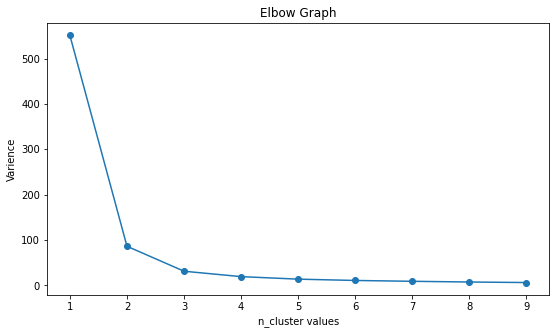

In [409]:
# visualising Elbow Graph
plt.figure(figsize=(9, 5))
plt.plot(range(1, 10), lst2, marker='o')
plt.title('Elbow Graph')
plt.xlabel("n_cluster values")
plt.ylabel("Varience")

In [410]:
# predicting the clusters 
kmeans = KMeans(n_clusters=3)
kmeans_pred_Y = kmeans.fit_predict(Y)

In [411]:
new_iris_data['clusters2'] = kmeans_pred_Y
new_iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusters1,clusters2
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1


In [412]:
df4 = new_iris_data[new_iris_data.clusters2==0]
df5 = new_iris_data[new_iris_data.clusters2==1]
df6 = new_iris_data[new_iris_data.clusters2==2]

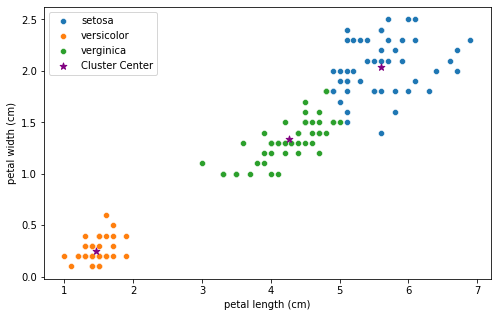

In [413]:
# visualising the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(df4["petal length (cm)"], df4["petal width (cm)"], label="setosa")
sns.scatterplot(df5["petal length (cm)"], df5["petal width (cm)"], label="versicolor")
sns.scatterplot(df6["petal length (cm)"], df6["petal width (cm)"], label="verginica")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label="Cluster Center", marker="*", color="purple", s=50)
plt.legend()